### 목표
- 학생 성적 데이터를 인공신경망 모델로
학습시켜보자!
- keras 활용법 숙지

In [ ]:
!ls   # 현재 작업 폴더의 내부(폴더, 파일) 살펴보기

drive  sample_data


In [ ]:
!pwd    # 현재 작업폴더 경로 확인

/content


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks
# 작업 폴더 경로 변경 하는 명령어 #cd

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!ls

 data  'ex01_Keras맛보기(학생성적데이터).ipynb'


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


### 데이터로딩

In [ ]:
import pandas as pd

In [ ]:
# 구분자 - 데이터가 : 로 저장되어 있음
studentData = pd.read_csv('./data/student-mat.csv', delimiter=';')

In [ ]:
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 문제와 답 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = studentData['studytime']    # studytime
y = studentData['G3']   # G3

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((296,), (296,))

In [ ]:
X_test.shape, y_test.shape

((99,), (99,))

### 신경망 모델 만들기
1. 신경망 구조 설계
2. 신경망 모델 학습 (loss, optimizer)/평가(metrics)방법 설정
3. 학습 및 학습과정 시각화
4. 모델 평가

In [ ]:
from tensorflow.keras import Sequential # 만들어줄 공간, 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 하나의 층의 디자인

In [ ]:
# 1. 신경망 구조 설계
model = Sequential()  # 딥러닝 모델을 구성하는 뼈대
# inputLayer : 입력층에서 사용, 데이터를 받아오는 역할, 입력 데이터의 형태를 지정
# 입력층 : 가장 처음에 있는 층
model.add(InputLayer(input_shape=(1,)) )  # 입력층 설정, 입력되는 크기근 하나
# Dense : 데이터를 분석 

# 중간층(은닉층)
# 입력층과 출력층을 제외한  층
# 본격적인 데이터의 분석
model.add(Dense(units=5))     # 퍼셉트론의 갯수
model.add(Dense(units=9))     # 중간층
model.add(Dense(units=4))     # 중간층 몇개를 넣어도 상관없음
# 출력층 
# 출력해줘야하는 값의 갯수에따라서 마지막층은 규칙이 있음
model.add(Dense(units=1))     # 출력층 마지막은 반드시 하나로 설정해 주어야함

In [ ]:
# 2. 신경망 모델 학습 (loss, optimizer)/평가(metrics)방법 설정

model.compile(loss='mean_squared_error',
              optimizer='SGD')

In [ ]:
# 3. 학습 및 학습과정 시각화
studentHistory = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 72.4944
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 79.3086
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 41.8344
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 27.3505
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 34.7497
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 19.1843
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 19.0618
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 18.7455
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 18.4565
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 19.2726
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 18.9028
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 19.5936
Epoch 13/100
10/10 [=====

In [ ]:
import matplotlib.pyplot as plt

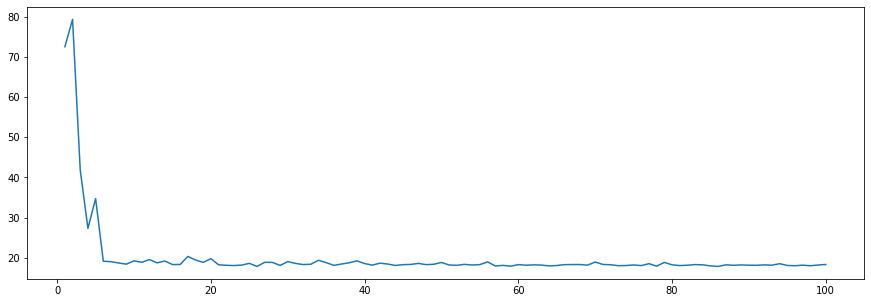

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(1,101),
         studentHistory.history['loss'],
         label='loss')
plt.show()

In [ ]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 29.2687


29.2686824798584